<a href="https://colab.research.google.com/github/V-dit/hotel-booking-analysis/blob/main/Hotel_Booking_Analysis_Final_File.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [46]:
# Importing important libraries
import ast
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

In [47]:
# Link the drive to load the data
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [48]:
# Load the csv as pandas dataframe
filepath = '/content/drive/MyDrive/Colab Notebooks/EDA Capstone Project/Hotel Booking/Hotel Bookings.csv'
hotel_df = pd.read_csv(filepath)

# **Viewing the data:**

In [49]:
# Viewing the data
hotel_df.head(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02


In [50]:
hotel_df.tail(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [345]:
# Viewing all the features
hotel_df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

## **Understanding the Features:**

1. Hotel => Type of Hotel

        Resort hotel
        City hotel

2. is_canceled => Cancellation Status of Booking

        1 -> Cancelled
        0 -> Not Cancelled

3. lead_time => This shows the difference of booking date and arrival date.

4. arrival_date_year => Year in which the visitor arrived

        2015, 2016, 2017

5. arrival_date_month => Month in which the visitor arrived
      
        January to December

6. arrival_date_week_number => Week number of year in which the visitor arrived
      
       1 to 53

7. arrival_date_day_of_month => Day number when the visitor arrived

       1 to 31

8. stays_in_weekend_nights => Number of weekend nights, i.e. Saturday and Sunday
    
9. stays_in_week_nights => Number of week nights, i.e. Monday to Friday

10. adults => Number of adults per booking

11. children => Number of children per booking

12. babies => Number of babies per booking

13. meal => Type of meal preferred.

        Undefined/SC –> no meal package
        BB -> Bed & Breakfast
        HB –> Half board (i.e., breakfast & one other meal – usually dinner)
        FB – Full board (i.e., breakfast, lunch & dinner)

14. country =>  Country of origin of visitor

15. market_segment => group of people based on market

        Direct, Corporate, Online TA, Offline TA/TO,
        Complementary, Groups, Aviation
        (TA: Travel agents, TO: Tour operators)

16. distribution_channel 

        Direct, Corporate, TA/TO, Undefined, GDS

17. is_repeated_guest => shows repeated customers

          1: Yes
          0: No

18. previous_cancellations => Number of previous bookings that were cancelled by the customer prior to the current booking

19. previous_bookings_not_canceled => 
Number of previous bookings not cancelled by the customer prior to the current booking

20. reserved_room_type => Type of room reserved

        'C', 'A', 'D', 'E', 'G', 'F', 'H', 'L', 'P', 'B'

21. assigned_room_type => Type of room whose possession is given at the time of arrival. 

        'C', 'A', 'D', 'E', 'G', 'F', 'H', 'L', 'P', 'B'

22. booking_changes => Number of bookigs changed

23. deposit_type => Types of deposit

        No Deposit, Non Refund, Refundable

24. agent => Agent Id

25. company = > Company Id

26. day_in_waiting_list => Number of days the booking was in the waiting list before confirmation

27. customer_type => Type of customer

        Contract, Group, Transient, Transient-party

28. adr => (average daily rate)

29. required_car_parking_spaces =>  Number of car parking spaces required by the customer

30. total_of_special_requests => Number of special requests made by the customer

31. reservation_status => Status of reservation

        Canceled, Check-Out, No-Show

32. reservation_status_date => Date at which the last status was updated

# **Preprocessing:**
1. Inspecting the data: Here first viewed the information of data with .info() command. However, isnull().sum() serves to be more appealing. Hence, using it to spot the null values.

  1. Inspecting the data for duplicate values and null values
  2. Get the basics stastics for each feature. (i.e. use df.describe())

2. Cleaning the data: We will create a new dataframe and deal with the null values by replacing it with appropriate values or may be drop them. This way we do not make any changes to the raw data.

  1. Remove duplicate values
  2. Replace null values
  3. Remove irrelevant data (i.e. drop cancelled bookings data)
  4. Dealing with the Outliers
  5. Changing the data types of features where necessary.
  6. Add derived features (added columns kids and total visitors)
  7. Dropping the rows that contains zero total visitors.
  8. Creating Functions.

**1.1 Inspecting the data for null values**

In [51]:
# Inspecting the data
hotel_df.isnull().sum().sort_values(ascending = False)

company                           112593
agent                              16340
country                              488
children                               4
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
hotel                                  0
previous_cancellations                 0
days_in_waiting_list                   0
customer_type                          0
adr                                    0
required_car_parking_spaces            0
total_of_special_requests              0
reservation_status                     0
previous_bookings_not_canceled         0
is_repeated_guest                      0
is_canceled                            0
distribution_channel                   0
market_segment                         0
meal                                   0
babies                                 0
adults                                 0
stays_in_week_ni

From this we can device that the following columns have null values, hence first we need to work on correcting these featuers:
'agent', 'company', 'country', 'children'

1. 'agent' - This refers to the agent Id.
  When the field is null, it means those customers/ bookings as direct to hotel, hence we need not omit them from the count. However, we can have a different class defined for them. The data amounts to '16340' rows hence, to retain the data of other associated columns we can replace the null values (NaN) with '0'.

2. 'company' - This refers to the employees belonging to a certain company. Hence if the field is null, it indicates the non employee trips. These could be the self funded trips. While the others could be funded by the company. So, here as well we can replace the null values (NaN) with '0'.

3. 'country'- Ideally every customer must belong to a unique country. Hence this field cannot be empty. We could either drop the rows containing the null values or replace them with mean/median or mode of the data. Here mode might be suitable because it means we will take the value with maximum occurance and fill it in place of the null values. This data is however quite less in number ('488' rows only) when compared to the volume of data. So, it might not have a  significant impact on the analysis.

4. 'children' - Null values may simply imply zero children. This case can be handeled similar to the preivous one. However, the impact on analysis will be low as the number of rows is just '4'.

 **1.2   Get the basics stastics for each feature.**

In [52]:
# To get the basic statistical data of each column. This can be used to draw useful conclusions in different aspects.
hotel_df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [269]:
# Creating a copy of the dataframe to avoid manipulation of the raw data.
df_bookings = hotel_df.copy()

**2.1 Removing dupicate entries:**

In [271]:
df_bookings[df_bookings.duplicated()].shape

(31994, 32)

In [272]:
df_bookings.drop_duplicates(inplace = True)

In [274]:
df_bookings.shape

(87396, 32)

**2.2 Replacing the null values:**

In [276]:
# Replace the NaN values in 'agent'and 'company' columns with 0.
df_bookings[['agent', 'company']] = df_bookings[['agent', 'company']].fillna(0)

In [277]:
# Finding the mode of country to get the country name with maximum occurance.
df_bookings['country'].mode()
# Here, we found portuguese as the maximum occurance. So we replace the nan values with the same.

0    PRT
dtype: object

In [278]:
# Replace the NaN values in 'agent'and 'company' columns with 0.
df_bookings['country'] = df_bookings['country'].fillna(df_bookings['country'].mode().to_string())
# Note: here, if the mode() is not written as string to the df, it will still remain a NaN value.

In [279]:
# Replace the NaN values in 'children' column with 0.
df_bookings['children'] = df_bookings['children'].fillna(0)

**2.3 Remove irrelevant data**

In [280]:
df_bookings['is_canceled'] = df_bookings['is_canceled'].replace([0,1], ['Not Cancelled', 'Cancelled'])

In [281]:
df_bookings.isnull().sum().sort_values(ascending = False)

hotel                             0
is_canceled                       0
reservation_status                0
total_of_special_requests         0
required_car_parking_spaces       0
adr                               0
customer_type                     0
days_in_waiting_list              0
company                           0
agent                             0
deposit_type                      0
booking_changes                   0
assigned_room_type                0
reserved_room_type                0
previous_bookings_not_canceled    0
previous_cancellations            0
is_repeated_guest                 0
distribution_channel              0
market_segment                    0
country                           0
meal                              0
babies                            0
children                          0
adults                            0
stays_in_week_nights              0
stays_in_weekend_nights           0
arrival_date_day_of_month         0
arrival_date_week_number    

**Now, let's have a look at the cancelled booking.**

([<matplotlib.patches.Wedge at 0x7f49c6694a50>,
 [Text(-0.8362179823011787, -0.7146603991240494, 'Not Cancelled'),
  Text(0.9122377988740129, 0.7796295263171452, 'Cancelled')],
 [Text(-0.4561188994370065, -0.3898147631585724, '72.5%'),
  Text(0.5321387160098408, 0.45478389035166805, '27.5%')])

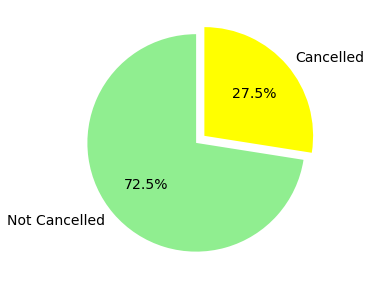

In [282]:
# Plotting the pie chart to view percentage of cancellation.
fig5 = plt.rcParams['figure.figsize'] = 5,5
labels = df_bookings['is_canceled'].value_counts().index.tolist()
plot_values = df_bookings['is_canceled'].value_counts().tolist()
explode = [0,0.1]
colors = ['lightgreen','yellow']
plt.pie(plot_values, labels = labels, colors=colors, explode = explode, autopct='%1.1f%%',startangle=90, textprops={'fontsize': 14})

Text(0.5, 1.0, 'Hotelwise plot data to cancelled bookings')

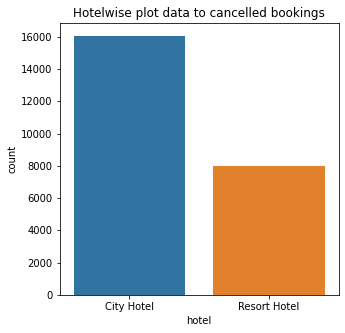

In [283]:
# Hotelwise plot data to cancelled bookings
bookings_cancelled = df_bookings[df_bookings['is_canceled'] == 'Cancelled'].groupby(['hotel']).size().reset_index(name = 'count')
sns.barplot(data = bookings_cancelled, x = 'hotel', y = 'count').set_title('Hotelwise plot data to cancelled bookings')

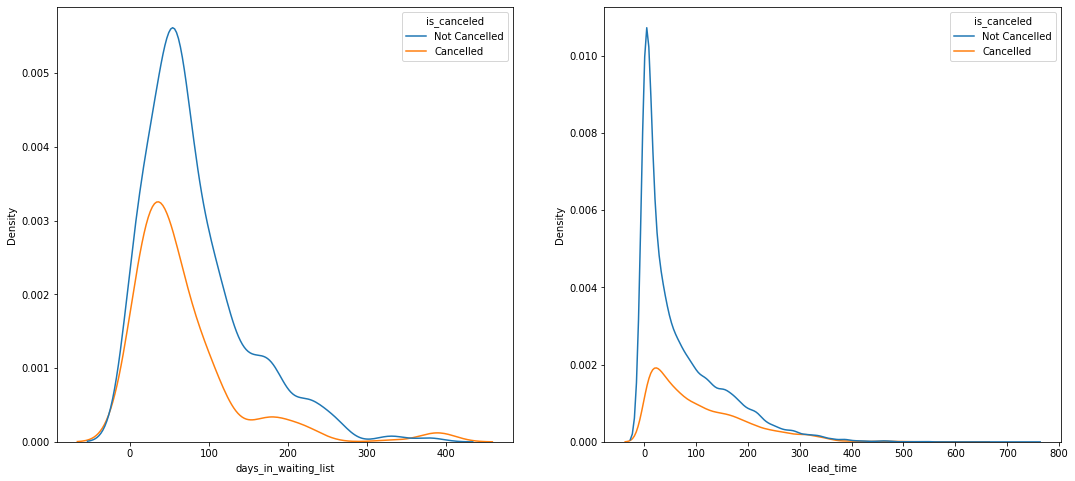

In [284]:
bookings_under_waiting = df_bookings[df_bookings['days_in_waiting_list'] !=0]

fig, axes = plt.subplots(1, 2, figsize=(18, 8))
sns.kdeplot(ax=axes[0],x = 'days_in_waiting_list', hue = 'is_canceled' , data = bookings_under_waiting)
sns.kdeplot(ax = axes[1], x = df_bookings['lead_time'], hue = df_bookings['is_canceled'])
plt.show()

From these graphs we see that the density for Cancelled and non cancelled bookings takes a peak in the range of 40 to 80 days. Both the plots follow the same trend. Indicating no change due to number of waiting days. Same is for lead time.

We can also interpreit from this that the average waiting time before canellation lies in the same range, i.e. 40-80 days.

In [285]:
# We need to remove 37.04% of the data which belongs to 'cancelled bookings'. Hence it will be irrelevant.
# Final df to use must not have data corresponding to cancelled bookings.
df = df_bookings[df_bookings['is_canceled'] == 'Not Cancelled']

In [286]:
# Shape of the final dataframe for analysis
df.shape

(63371, 32)

In [287]:
df.describe()

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,63371.000000,63371.000000,63371.000000,63371.000000,63371.000000,63371.000000,63371.000000,63371.000000,63371.000000,63371.000000,63371.000000,63371.000000,63371.000000,63371.000000,63371.000000,63371.000000,63371.000000,63371.000000,63371.000000
mean,70.099588,2016.173108,26.826182,15.786559,0.967020,2.520538,1.844235,0.119724,0.012261,0.049770,0.018715,0.239605,0.313535,81.065614,13.504616,0.722034,102.001961,0.116157,0.760316
std,81.629723,0.691354,13.929518,8.812966,1.013302,2.001207,0.517935,0.420642,0.122791,0.217472,0.296575,1.969027,0.772101,110.320345,59.446690,9.748835,51.393422,0.324964,0.849904
min,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,7.000000,2016.000000,15.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,0.000000,0.000000,67.990000,0.000000,0.000000
50%,38.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,94.500000,0.000000,1.000000
75%,110.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,196.000000,0.000000,0.000000,129.200000,0.000000,1.000000
max,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,4.000000,3.000000,10.000000,1.000000,13.000000,72.000000,21.000000,535.000000,541.000000,379.000000,510.000000,8.000000,5.000000


**2.4 Dealing with Outliers**

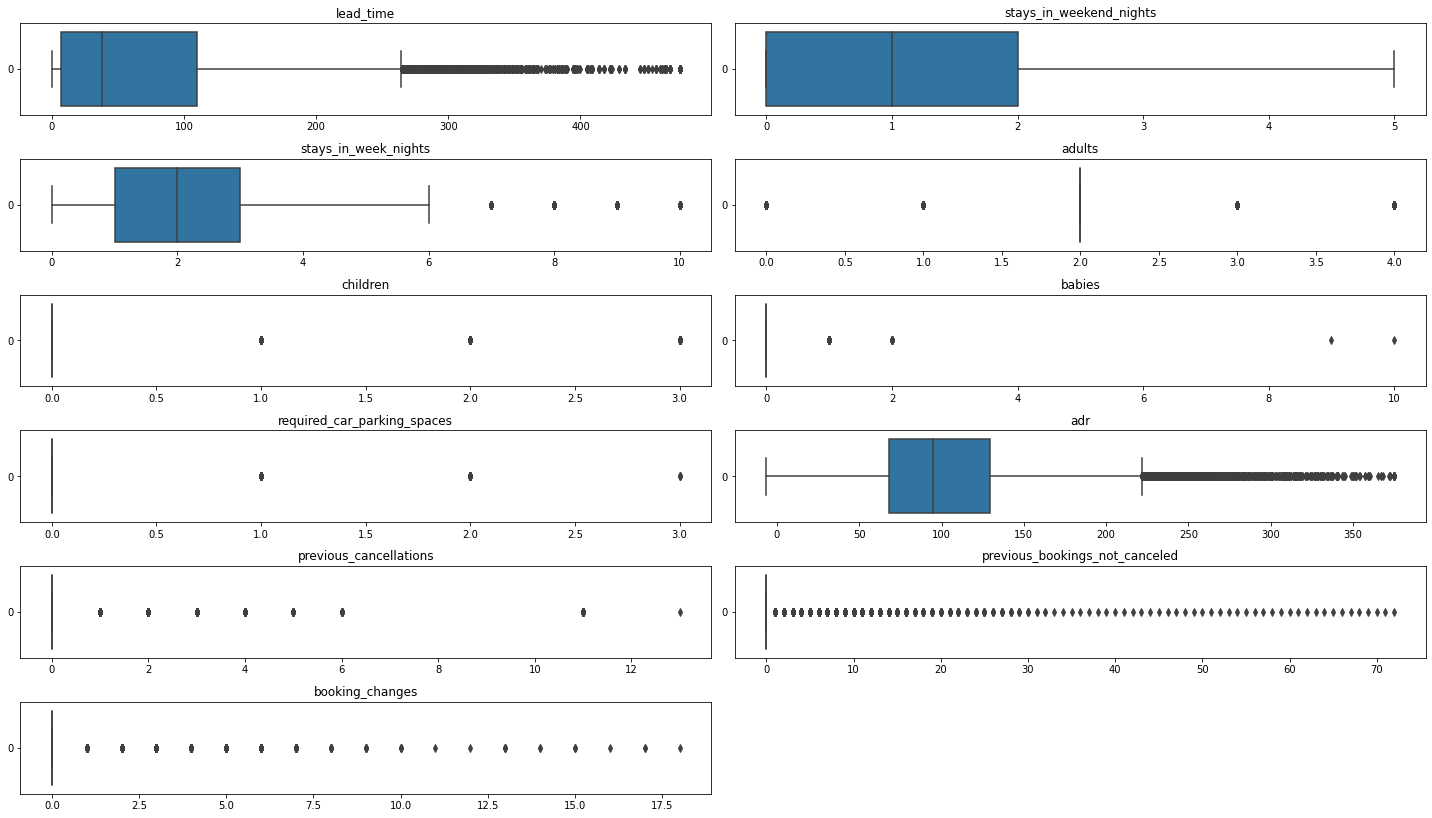

In [346]:
# Here we are selecting a series of features/ columns to plot a box graph of it. This will help to check the outliers and deal with them 
columns = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'required_car_parking_spaces', 'adr', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes']
n = 1
plt.figure(figsize=(20,15))

for column in columns:
  plt.subplot(8,2,n)
  n = n+1
  plot_box = sns.boxplot(data = df[column], orient = 'h')
  plot_box.set_title(column)
  plt.tight_layout()

In [290]:
# Replacing the outliers with appropriate values
df.loc[df.lead_time > 475, 'lead_time'] = 475
df.loc[df.stays_in_weekend_nights >=  5, 'stays_in_weekend_nights'] = 5
df.loc[df.stays_in_week_nights > 10, 'stays_in_week_nights'] = 10
df.loc[df.adr > 375, 'adr'] = 375
df.loc[df.required_car_parking_spaces > 3, 'required_car_parking_spaces'] = 3

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [291]:
df.isnull().sum().sort_values(ascending = False)

hotel                             0
is_canceled                       0
reservation_status                0
total_of_special_requests         0
required_car_parking_spaces       0
adr                               0
customer_type                     0
days_in_waiting_list              0
company                           0
agent                             0
deposit_type                      0
booking_changes                   0
assigned_room_type                0
reserved_room_type                0
previous_bookings_not_canceled    0
previous_cancellations            0
is_repeated_guest                 0
distribution_channel              0
market_segment                    0
country                           0
meal                              0
babies                            0
children                          0
adults                            0
stays_in_week_nights              0
stays_in_weekend_nights           0
arrival_date_day_of_month         0
arrival_date_week_number    

**2.5 Changing the data types of features where necessary.**

In [292]:
df.dtypes

hotel                              object
is_canceled                        object
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [293]:
# Convert the data type from float to integer
df[['children', 'agent', 'company']] = df[['children', 'agent', 'company']].astype('int64')

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



**2.6 Add derived features (added columns kids and total visitors)**

In [294]:
# Adding two more columns, viz total visitors and kids
df['kids'] = df.children + df.babies
df['total_visitors'] = df.adults + df.kids

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [295]:
df['total_visitors'].value_counts()

2     40957
1     12978
3      6918
4      2263
0       150
5       103
12        1
10        1
Name: total_visitors, dtype: int64

**2.7 Dropping the rows that contains zero total visitors.**

In [296]:
# Dropping the rows that contains zero total visitors.
df = df[df['total_visitors'] != 0]

In [352]:
# Checking the shape of final dataframe on which we will perform the analysis.
# Note: Presently it will display two extra features than anticipated.
#       This is because the feature 'adr_per_person' and 'price' were derived and added during the later stage of analysis. 
df.shape

(63221, 36)

**2.8 Creating Functions.**

In [298]:
# To find the percentage value for any column
def convert_to_percentage(pdseries, limit = None):
  if limit != None:
    pdseries = pdseries.value_counts()[:limit]
  else:
    pdseries = pdseries.value_counts()
  x = pdseries.index
  y = (pdseries/pdseries.sum()) * 100

  return x, y

In [299]:
# Defining function for countplot
def countplot(data, x, hue, title = None, x_label = None, y_label = None, rotate = None):
  plot = sns.countplot(data=data, x = x, hue = hue)
  plt.legend(loc='upper right')
  plot.set_title(title)
  if rotate == None:
    plt.xticks(rotation = 90)
  else:
    plt.xticks(rotation = rotate)
  plot.set_xlabel(x_label)
  plot.set_ylabel(y_label)
  plt.show()

# **Starting the EDA (Exploratory Data Analysis):**

**Q1. What are the types of Hotels in the data?**

In [300]:
# Getting the hotel types in the data.
hotel_names = df['hotel'].unique()
print(f'The hotel types are: {hotel_names}')

The hotel types are: ['Resort Hotel' 'City Hotel']


**Q2. What is the percentage of booking for each hotel?**

Text(0.5, 1.0, 'Percentage of booking wrt hotel type')

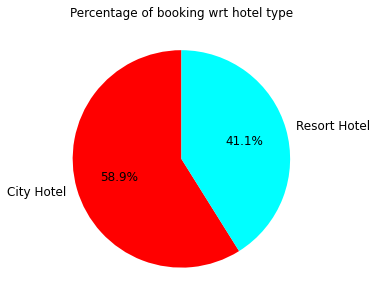

In [301]:
# From the data, plotting the Percentage of booking wrt hotel type
fig1 = plt.rcParams['figure.figsize'] = 5,5
labels = df['hotel'].value_counts().index.tolist()
values = df['hotel'].value_counts().tolist()
colors = ['red','cyan']
plt.pie(values, labels=labels, colors=colors, autopct='%1.1f%%',startangle=90, textprops={'fontsize': 12})
plt.title('Percentage of booking wrt hotel type')

**Q3. What is the yearwise trend of bookings for each hotel?**

Text(0, 0.5, 'Booking Counts')

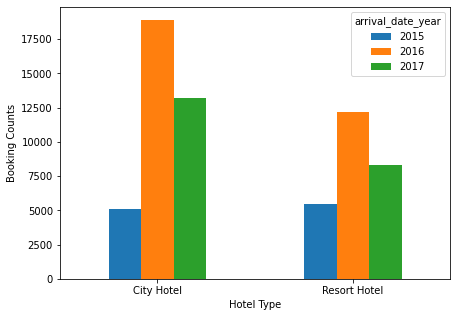

In [302]:
# Looking at the yearwise distribution of booking counts for each hotel
fig2 = plt.rcParams['figure.figsize'] = 7,5
hotelwise_booking_matrix = (df.groupby(['hotel', 'arrival_date_year']).count()['total_visitors'])
hotelwise_booking_matrix.unstack('arrival_date_year').plot.bar()
plt.xticks(rotation = 0)
plt.xlabel('Hotel Type')
plt.ylabel('Booking Counts')

**A3:** From the above graph we can say that:
1. Year 2016 had the most number of bookings. This trend remains the same for both the hotel types. However, this conclusion is less relevant because we have data of only six months for the year of 2015 and 2017 which is half as compared to the data of the year 2016.
2. Considering the above view point, we can say that 2017 performed relatively better with just the data of six months, it has achieved 75% booking as compared to the previous year (i.e. 2016).


**Q4. Which agent made the most number of bookings?**

In [364]:
# Getting the list of agents in the list
agent_ids = sorted(df['agent'].dropna().unique())
print(f'The agent ids are: {agent_ids}')

# Total number of agents in the list
print(f'The total number of agents in the above list is: {len(agent_ids)}')

# How many bookings came through agents
not_by_agent =df['agent'].loc[df['agent'] == 0].count()
print(f'Total bookings that came by means of agents is: {df.shape[0] - int(not_by_agent)}/{df.shape[0]}')

# Percentage of booking
agent_booking_percentage = round(100 * ((df.shape[0] - int(not_by_agent))/df.shape[0]),2)
print(f'Agent booking Percentage: {agent_booking_percentage} %')

The agent ids are: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 42, 44, 45, 47, 50, 52, 53, 54, 56, 57, 58, 59, 61, 63, 64, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 77, 78, 79, 81, 82, 83, 85, 86, 87, 88, 89, 90, 91, 92, 94, 95, 96, 98, 99, 103, 104, 105, 106, 110, 111, 112, 114, 115, 117, 118, 119, 121, 122, 126, 127, 128, 129, 132, 133, 134, 135, 138, 139, 141, 142, 143, 144, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 163, 165, 167, 168, 171, 173, 174, 175, 177, 179, 180, 181, 182, 183, 184, 185, 187, 191, 192, 193, 195, 196, 197, 201, 205, 208, 210, 211, 213, 214, 215, 216, 219, 220, 223, 227, 229, 232, 234, 240, 241, 242, 243, 244, 245, 247, 248, 249, 250, 251, 252, 253, 254, 256, 258, 261, 262, 265, 267, 269, 270, 273, 275, 278, 280, 281, 282, 283, 285, 288, 289, 290, 294, 295, 296, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 310, 313, 314,

Text(0, 0.5, 'Booking Counts')

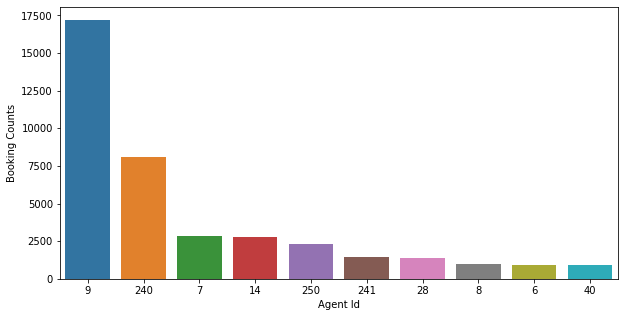

In [304]:
# Top 10 Agents wih maximum booking
agent_list = pd.DataFrame(df['agent'].value_counts()).reset_index().rename(columns = {'index':'agent','agent':'Booking Count'}).sort_values(by = 'Booking Count', ascending = False)
agent_list.drop(agent_list[agent_list['agent'] == 0].index, inplace = True)
agent_list = agent_list[:10]
plt.figure(figsize = (10,5))
agent_plot = sns.barplot(x = 'agent', y = 'Booking Count', data = agent_list, order = agent_list.sort_values('Booking Count', ascending = False).agent)
agent_plot.set_xlabel('Agent Id')
agent_plot.set_ylabel('Booking Counts')

**A4:** Agent with Id number 9 made the most number of bookings.

**Q5: Enlist the country of origin of the majority of visitors.**

In [305]:
# Importing a dictionary for country name from country initials
# Incase 'pycountry' isn't installed, run the below code.
#pip install pycountry
import pycountry as pyc

In [306]:
# # Need to get this working. If possible, drop the rows with zero values
# country_list = df['country'].loc[df['country'] != '0']

# # list1 = []
# # for initial in country_list :
# #   list1.append(pyc.countries.get(alpha_3=initial).name)
# country_name = [pyc.countries.get(alpha_3=name).name for name in country_list]


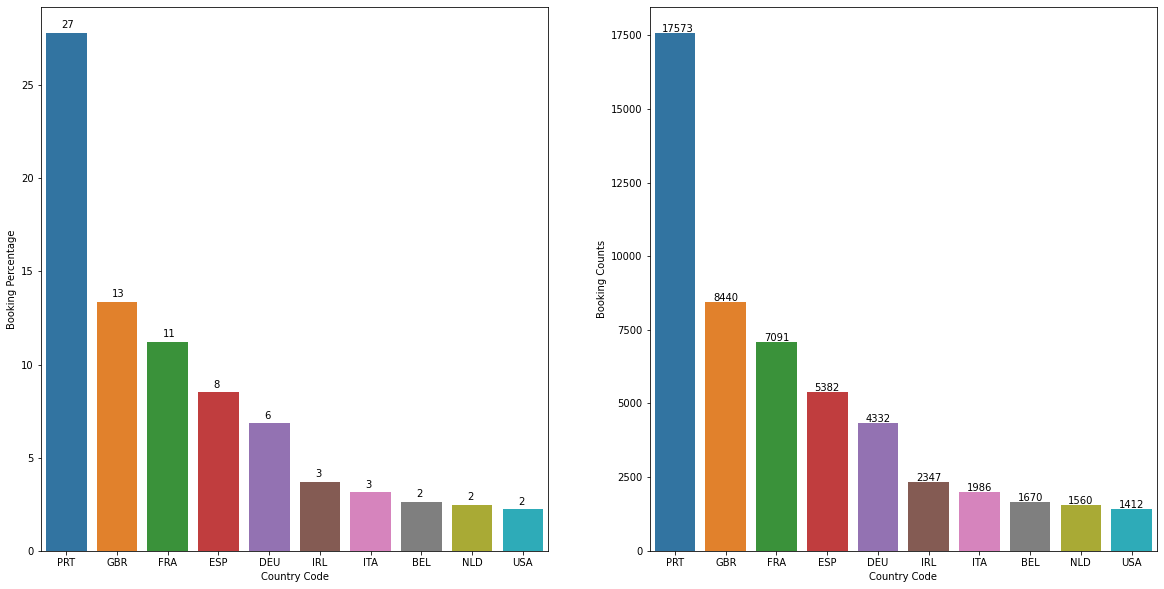

In [307]:
# Plot the percentage of booking/ customers from top 10 countries
fig3 = plt.rcParams['figure.figsize'] = 20,10

plt.subplot(1,2,1)
x, y = convert_to_percentage(df['country'])
plot1 = sns.barplot(x = x[:10], y = y[:10])
plot1.set_xlabel('Country Code')
plot1.set_ylabel('Booking Percentage')

# To mention the column values for each column
for i, v in enumerate(y[:10]):
    plot1.text(i-0.1, v+0.25, int(v),color = 'black')

plt.subplot(1,2,2)
a = df['country'].value_counts()
plot2 = sns.barplot(x = a[:10].index, y = a[:10])
plot2.set_xlabel('Country Code')
plot2.set_ylabel('Booking Counts')

# To mention the column values for each column
for i, v in enumerate(a[:10]):
    plot2.text(i-0.25, v+30, int(v),color = 'black')
plt.show()

**A5:** Majority of the visitors are from the country 'Portugal' with Country Code 'PRT'.
The second one on the list is the 'Great Britain', i.e., 'GBR'.

**Plotting the countrywise data on World Map**

In [391]:
# Plotting the same on a map
visitors_from_country = df.groupby(['country']).size().reset_index(name = 'count')

fig5 = px.choropleth(visitors_from_country, locations = "country",
              color= "count", hover_name= "country", 
              color_continuous_scale=px.colors.sequential.Viridis_r)

# Arrange the title at the centre of the page
fig5.update_layout(title={'text' : 'Country of origin of visitors',
                          'x':0.5,'xanchor': 'center'},
                   coloraxis_colorbar_x=0.80)

**Basic Analysis of Countries:**

In [309]:
# Getting the country of origin for customers included in the data
countrywise_customer = sorted(df['country'].dropna().unique())
print(f'The customers come from these countries: {countrywise_customer}')

# Total number of countries in the list
company_ids = sorted(df['company'].dropna().unique())
print(f'Customers from {len(company_ids)} different countries visited these two hotels.')

The customers come from these countries: ['0    PRT', 'ABW', 'AGO', 'AIA', 'ALB', 'AND', 'ARE', 'ARG', 'ARM', 'ASM', 'ATA', 'ATF', 'AUS', 'AUT', 'AZE', 'BDI', 'BEL', 'BFA', 'BGD', 'BGR', 'BHR', 'BHS', 'BIH', 'BLR', 'BOL', 'BRA', 'BRB', 'BWA', 'CAF', 'CHE', 'CHL', 'CHN', 'CIV', 'CMR', 'CN', 'COL', 'COM', 'CPV', 'CRI', 'CUB', 'CYM', 'CYP', 'CZE', 'DEU', 'DJI', 'DMA', 'DNK', 'DOM', 'DZA', 'ECU', 'EGY', 'ESP', 'EST', 'ETH', 'FIN', 'FRA', 'FRO', 'GAB', 'GBR', 'GEO', 'GHA', 'GIB', 'GNB', 'GRC', 'GTM', 'GUY', 'HKG', 'HRV', 'HUN', 'IDN', 'IND', 'IRL', 'IRN', 'IRQ', 'ISL', 'ISR', 'ITA', 'JAM', 'JOR', 'JPN', 'KAZ', 'KEN', 'KIR', 'KNA', 'KOR', 'KWT', 'LAO', 'LBN', 'LBY', 'LCA', 'LIE', 'LKA', 'LTU', 'LUX', 'LVA', 'MAC', 'MAR', 'MCO', 'MDG', 'MDV', 'MEX', 'MKD', 'MLI', 'MLT', 'MMR', 'MNE', 'MOZ', 'MRT', 'MUS', 'MWI', 'MYS', 'NAM', 'NCL', 'NGA', 'NLD', 'NOR', 'NPL', 'NZL', 'OMN', 'PAK', 'PAN', 'PER', 'PHL', 'PLW', 'POL', 'PRI', 'PRT', 'PRY', 'PYF', 'QAT', 'ROU', 'RUS', 'RWA', 'SAU', 'SDN', 'SEN', 'S

**For each hotel, looking at the number of different countries from which the visitors arrived:**

In [310]:
# Groupby Hotel Name to get the country of origin of customers for each hotels.
grouped_hotel_country = df.groupby(['hotel'])['country']

# Get list of countires for each hotel
resort_hotel_country_list = grouped_hotel_country.get_group('Resort Hotel').unique()
city_hotel_country_list = grouped_hotel_country.get_group('City Hotel').unique()

print(f'Hotel "Resort Hotel" has got customers visiting from {len(resort_hotel_country_list)} different countries.')
print(f'Hotel "City Hotel" has got customers visiting from {len(city_hotel_country_list)} different countries.')

Hotel "Resort Hotel" has got customers visiting from 119 different countries.
Hotel "City Hotel" has got customers visiting from 151 different countries.


**Basic Analysis of possible business tours and personal tour :**

In [393]:
# Getting the ids of all companies included in the data
company_ids = sorted(df['company'].dropna().unique())
print(f'The company ids are: {company_ids}')

# Total number of companies in the list
print(f'The total number of companies in the above list is: {len(company_ids)}')

# Total bookings that do not belong to any company
company_customers = df['company'].loc[df['company']!= 0].count()
print(f'Total {company_customers} visitors were possibly on business tours.')

The company ids are: [0, 6, 8, 9, 10, 11, 12, 14, 16, 18, 20, 22, 28, 29, 31, 32, 34, 35, 38, 39, 40, 42, 43, 45, 46, 47, 49, 51, 52, 53, 54, 59, 61, 62, 64, 65, 67, 68, 71, 72, 73, 76, 78, 80, 81, 82, 83, 84, 85, 86, 88, 91, 92, 93, 94, 96, 99, 100, 101, 103, 104, 105, 106, 107, 108, 109, 110, 112, 113, 115, 116, 118, 120, 126, 127, 130, 132, 135, 137, 139, 140, 142, 143, 144, 146, 148, 149, 150, 153, 154, 158, 159, 160, 163, 165, 167, 168, 169, 174, 178, 179, 180, 183, 184, 185, 186, 192, 193, 195, 197, 200, 203, 204, 207, 209, 210, 212, 213, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 227, 229, 230, 232, 233, 234, 237, 238, 240, 242, 243, 245, 246, 250, 251, 254, 255, 257, 258, 259, 260, 263, 264, 268, 269, 270, 271, 272, 273, 274, 275, 277, 278, 280, 281, 282, 284, 286, 287, 289, 290, 291, 292, 293, 297, 301, 302, 304, 305, 307, 308, 311, 312, 313, 317, 318, 319, 320, 323, 324, 325, 329, 330, 331, 332, 333, 334, 337, 338, 341, 342, 343, 346, 347, 349, 350, 351, 352, 353,

# **Q6. What is the busiest time for hotels?**

**Now, looking at the arrival period:**

In [427]:
# Adding a column to see if the tour is business tour
df1 = df.copy()
df1['is_business_tour'] = df1['company'].copy()

# for val in df1['is_business_tour']:
#   if val == 0:
#     df1['is_business_tour'] = 'No'
#   else:
#     df1['is_business_tour'] = 'Yes'



In [424]:
df1['is_business_tour'].unique()

array(['No'], dtype=object)

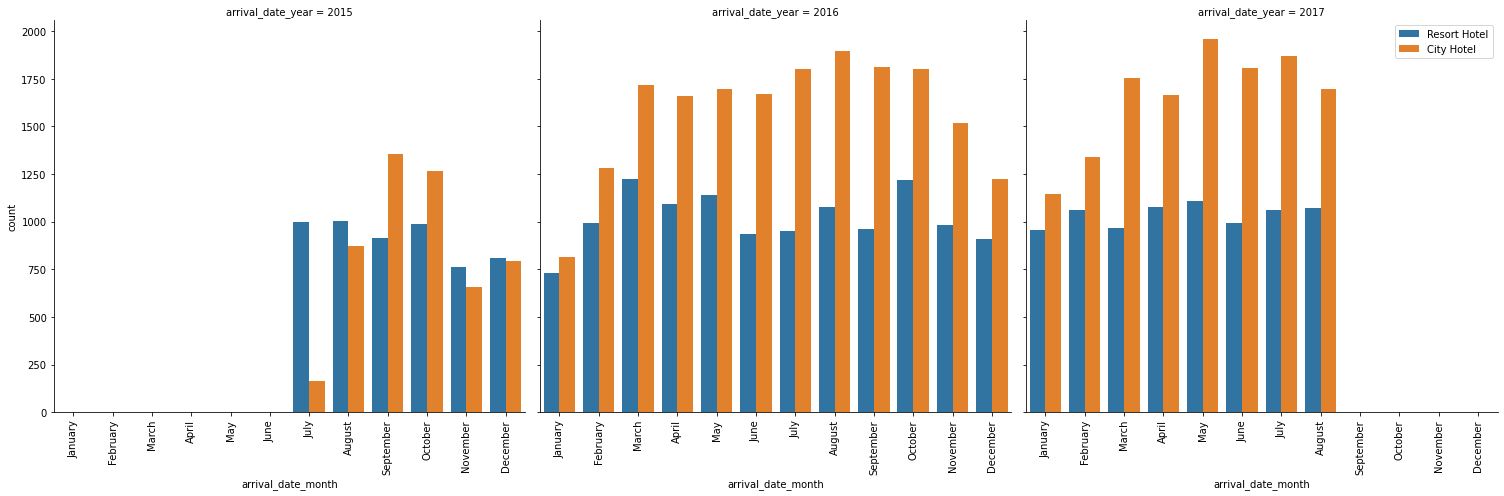

In [412]:
# Analysing the monthly arrival for each year
# Creating a list to order the months
order_months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

arrival_data = df[['hotel', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number',
              'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights']]

fig = plt.rcParams['figure.figsize'] = 20,10
plot3 = sns.catplot(x = 'arrival_date_month', hue = 'hotel', col = 'arrival_date_year',
            data = arrival_data, kind="count", height=7, aspect=1, order = order_months, legend = False)

plt.legend(loc='upper right')

for axes in plot3.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
plt.tight_layout()

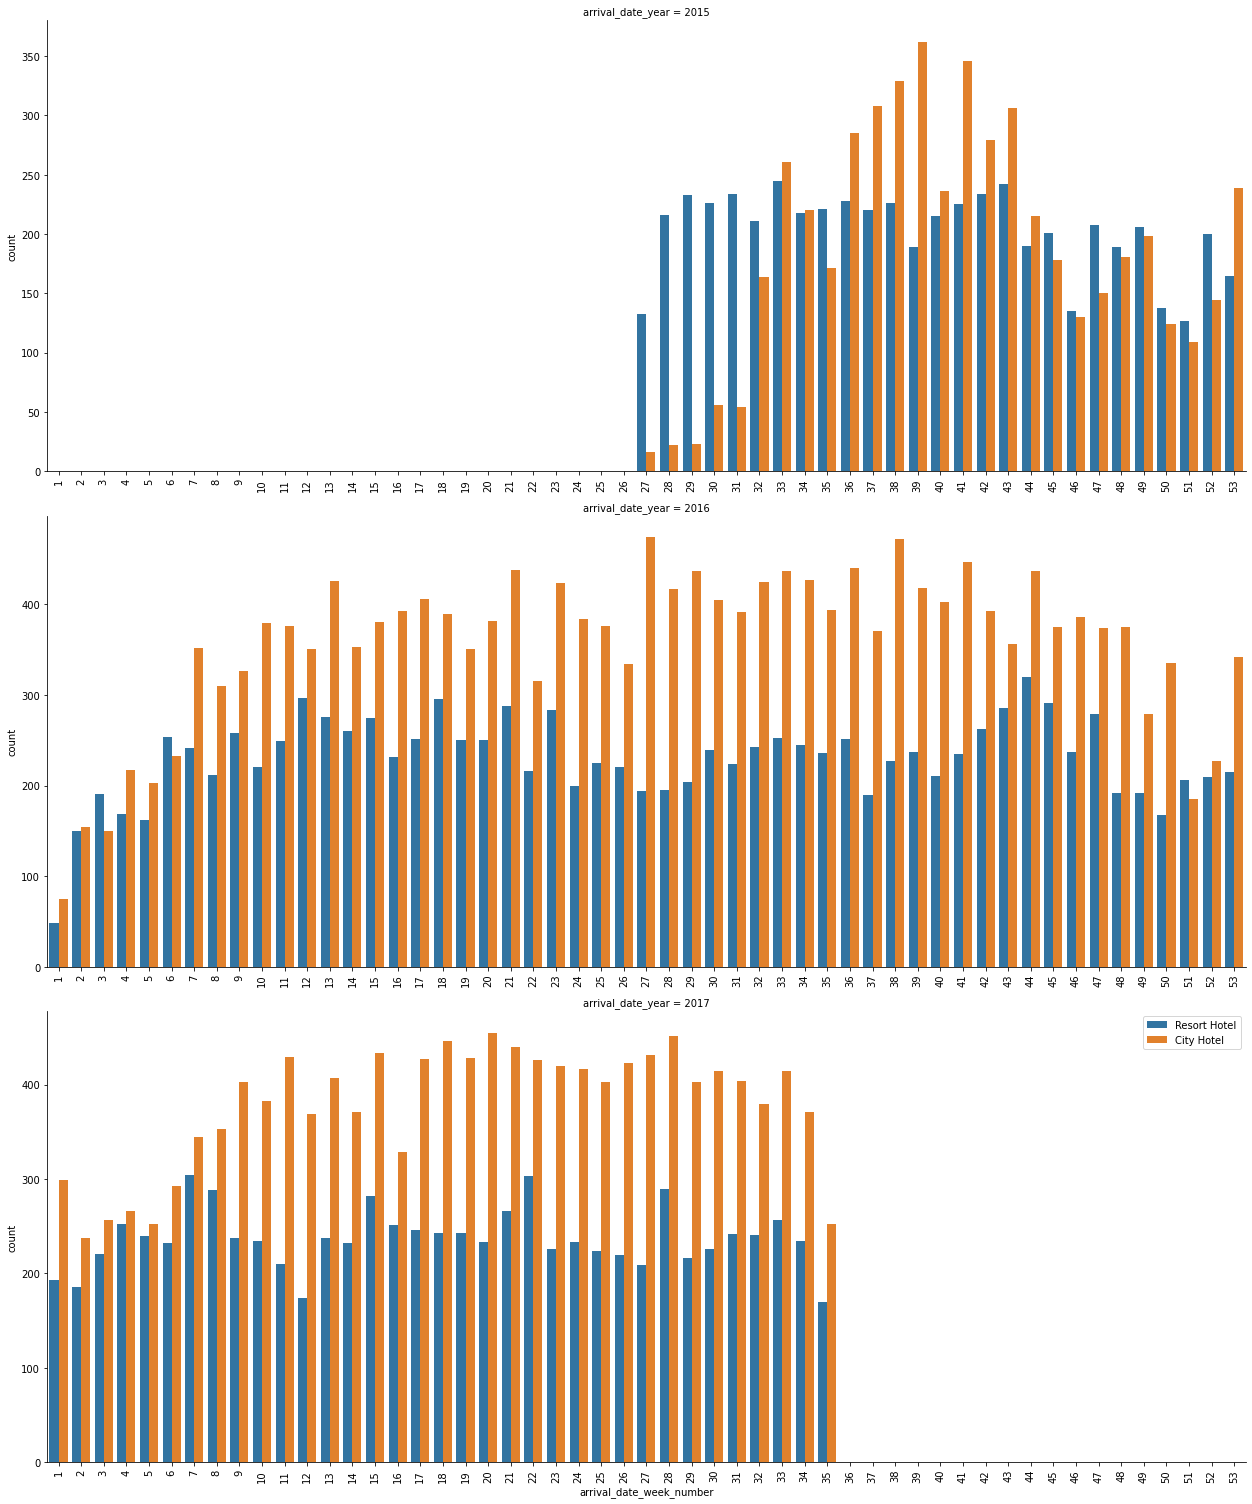

In [413]:
# Analysing the weekly arrival for each year
# Creating a list to order the week by week number
week_order = list(range(1,54))

fig = plt.rcParams['figure.figsize'] = 20,7

plot = sns.catplot(x = 'arrival_date_week_number', hue = 'hotel', col = 'arrival_date_year',col_wrap=1, 
            data = arrival_data, kind="count", height=7, aspect=2.5, order = week_order, legend = False, legend_out = True, sharex=False, sharey=False)
plt.legend(loc='upper right')
for axes in plot.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
plt.tight_layout()

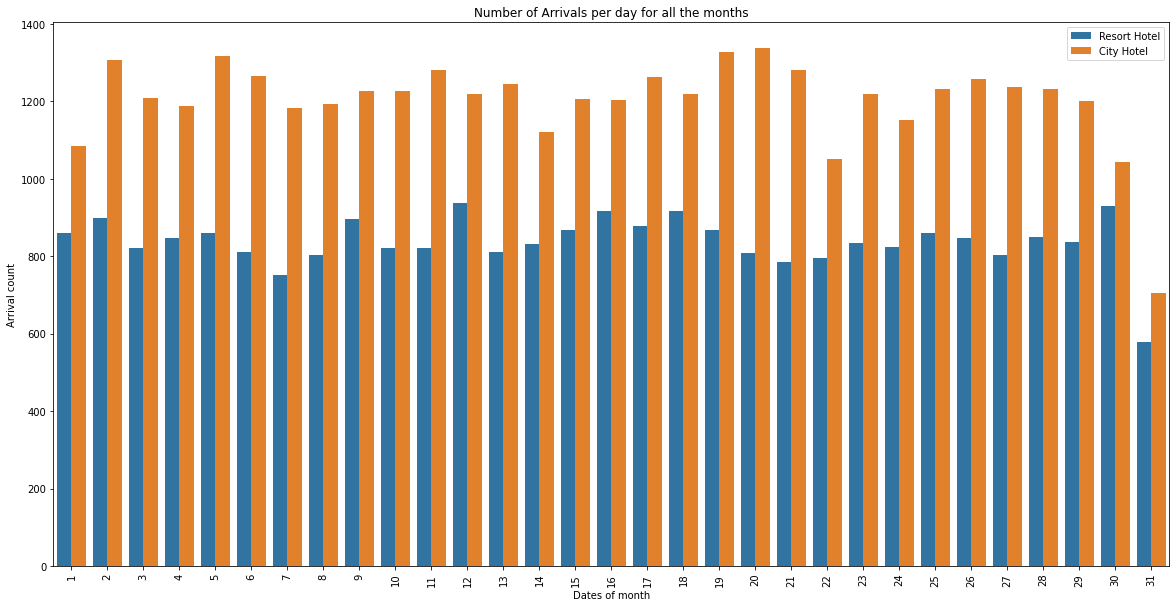

In [314]:
# Arrival data as per day of month, combined for all the months:
countplot(data = arrival_data, x = 'arrival_date_day_of_month', hue = 'hotel',
          title = 'Number of Arrivals per day for all the months' , x_label = 'Dates of month', y_label = 'Arrival count',
          rotate = 90)

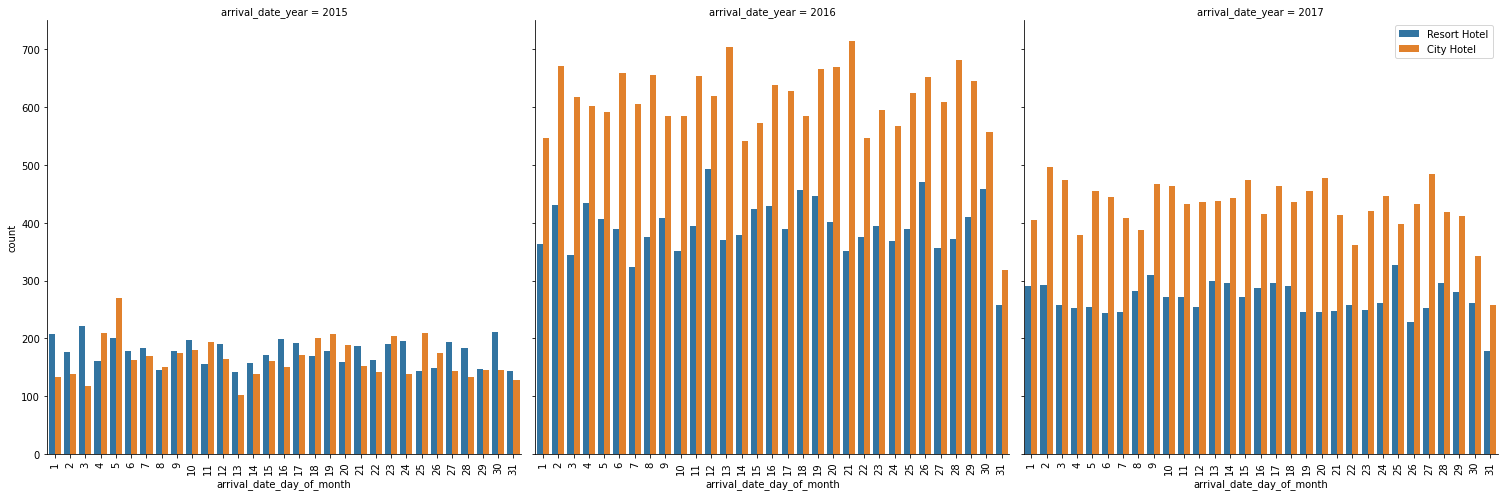

In [415]:
# Number of Arrivals per day for all months, shown yearly
plot = sns.catplot(x = 'arrival_date_day_of_month', hue = 'hotel', col = 'arrival_date_year',
            data = arrival_data, kind="count", height=7, aspect=1, legend = False)
plt.legend(loc='upper right')

for axes in plot.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
plt.tight_layout()

A6: From this we can say that:


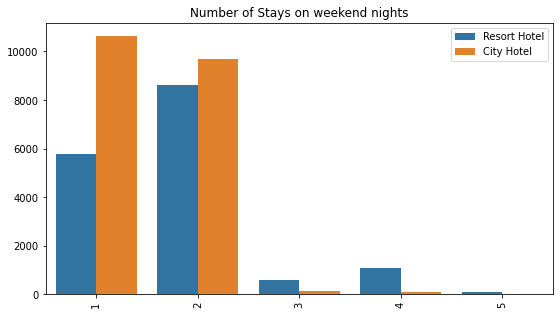

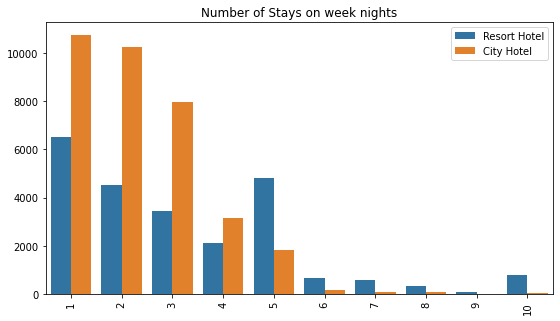

In [316]:
# To show weekend night stays vs week night stays.
fig7 = plt.rcParams['figure.figsize'] = 20,5
plt.subplot(1,2,1)
countplot(data = arrival_data.loc[(arrival_data['stays_in_weekend_nights'] != 0)],
          x = 'stays_in_weekend_nights', hue = 'hotel', title = 'Number of Stays on weekend nights')

plt.subplot(1,2,2)
countplot(data = arrival_data.loc[(arrival_data['stays_in_week_nights'] != 0)],
          x = 'stays_in_week_nights', hue = 'hotel', title = 'Number of Stays on week nights')

In [317]:
hotel_total_visitors = df.groupby(['hotel'])['total_visitors']
hotel_total_visitors.describe()

,count,mean,std,min,25%,50%,75%,max
hotel,,,,,,,,
City Hotel,37239.0,1.983861,0.696783,1.0,2.0,2.0,2.0,12.0
Resort Hotel,25982.0,1.976676,0.677796,1.0,2.0,2.0,2.0,5.0


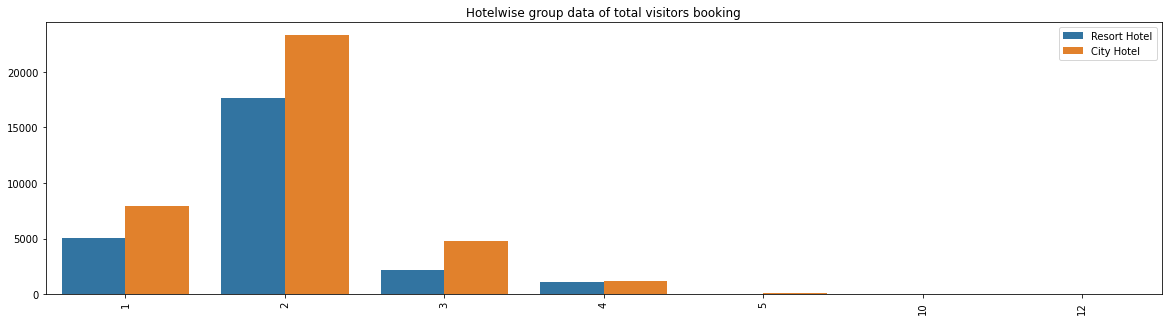

In [318]:
# Plot for Total Visitors
df_total_visitors = df.groupby(['hotel'])['total_visitors'].sum()
fig2 = plt.rcParams['figure.figsize'] = 20,5

plot3 = countplot(data = df[['hotel','total_visitors']], x = 'total_visitors', hue = 'hotel', title = 'Hotelwise group data of total visitors booking')

In [319]:
# Previously Cancelled
total_bookings = df['previous_cancellations'].value_counts().sum()
total_bookings_cancelled = df[['previous_cancellations']].loc[(df['previous_cancellations'] != 0)].value_counts().sum()
print(f'Total previously cancelled bookings are {total_bookings_cancelled}')

Total previously cancelled bookings are 538


**Analysing the bookings for individual market segments**

In [320]:
# Looking at the market segments
df.market_segment.unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Aviation'], dtype=object)

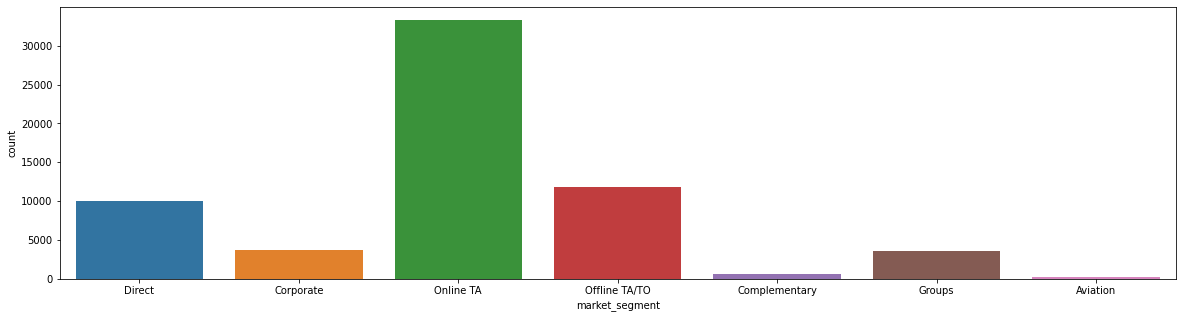

In [321]:
# Total bookings count from individual market segement
sns.countplot(data = df, x = 'market_segment')

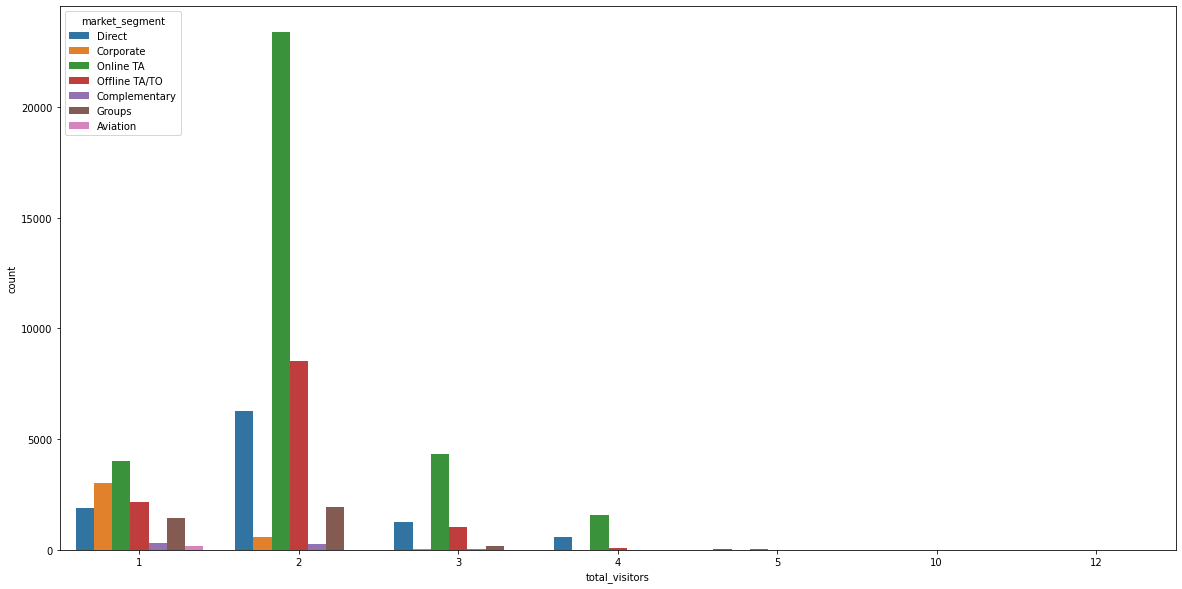

In [322]:
# Total Visitors from different market segments
plt.figure(figsize=(20,10))
sns.countplot(data = df, x = 'total_visitors', hue = 'market_segment')

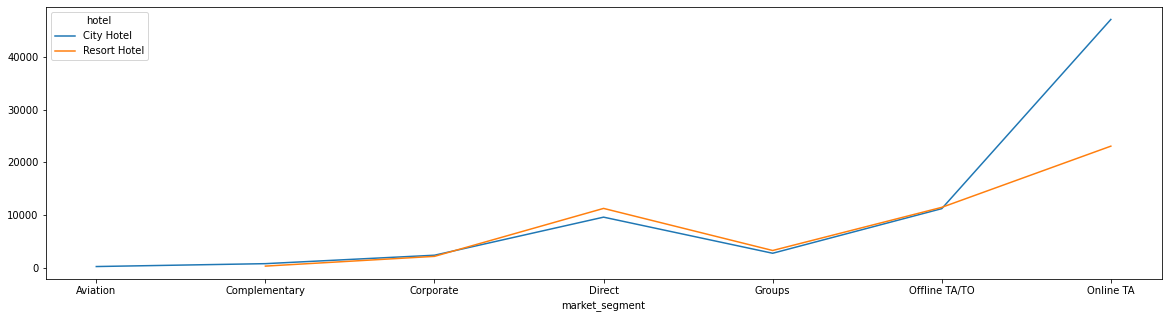

In [323]:
# To plot hotelwise data of total visitors belonging to specific market_segment.
m2 = df.groupby(['market_segment', 'hotel']).sum()['total_visitors']
m2.unstack().plot()

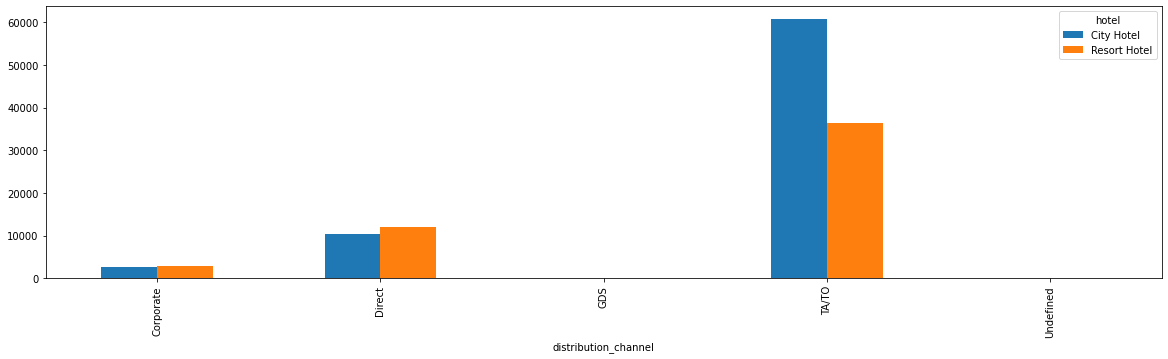

In [324]:
d2 = df.groupby(['distribution_channel', 'hotel']).sum()['total_visitors']
d2.unstack().plot(kind = 'bar')

In [325]:
# Defining new df for distribution channel
distribution_channel1 = df.groupby(['hotel', 'distribution_channel']).sum()['adults']

# Extracting pandas series out of this df to use it in plot
d_c = distribution_channel1[:4]
d_r = distribution_channel1[4:]

Text(0.5, 1.0, 'For Resort Hotel')

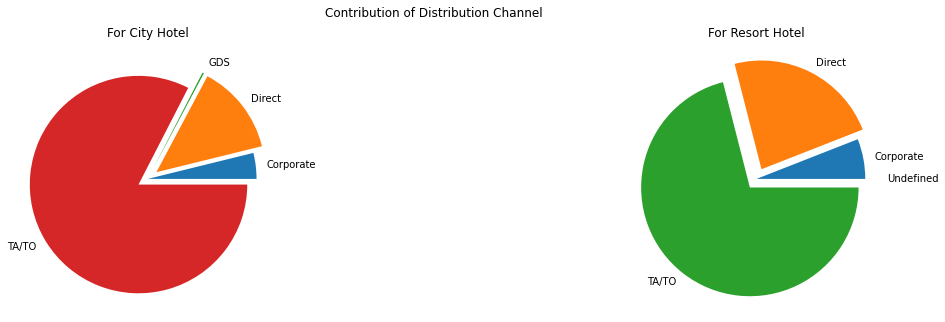

In [326]:
# Plotting a pie chart of this data
label1 = ['Corporate', 'Direct', 'GDS', 'TA/TO'] # Need to search for an option to add labels automatically.
label2 = ['Corporate', 'Direct', 'TA/TO', 'Undefined']

explode = (0, 0.1, 0.1, 0.1)
plt.suptitle('Contribution of Distribution Channel') # To add the main title to the graph
# Need to remove this extra gap

# Subplot1: Pie chart for City Hotel
plt.subplot(1, 2, 1)
plt.pie(d_c, labels=label1, explode = explode)
plt.title('For City Hotel')

# Subplot2: Pie chart for Resort Hotel
plt.subplot(1, 2, 2)
plt.pie(d_r, labels=label2, explode = explode)
plt.title('For Resort Hotel')

For both the hotels, the distribution channel 'TA/TO' contributed the maximum.

**Now, looking for Repeated Customers**

In [327]:
# Finding repeated customers
repeated_customer = df.copy()
repeated_customer['is_repeated_guest'] = repeated_customer['is_repeated_guest'].replace([0,1], ['No', 'Yes'])

In [328]:
# Counting the total repeated customers
repeated_customer['is_repeated_guest'].value_counts()

No     60117
Yes     3104
Name: is_repeated_guest, dtype: int64

In [329]:
hotelwise_repeated_customers = repeated_customer.groupby(['is_repeated_guest', 'hotel']).count()['total_visitors']
print(hotelwise_repeated_customers)

is_repeated_guest  hotel       
No                 City Hotel      35770
                   Resort Hotel    24347
Yes                City Hotel       1469
                   Resort Hotel     1635
Name: total_visitors, dtype: int64


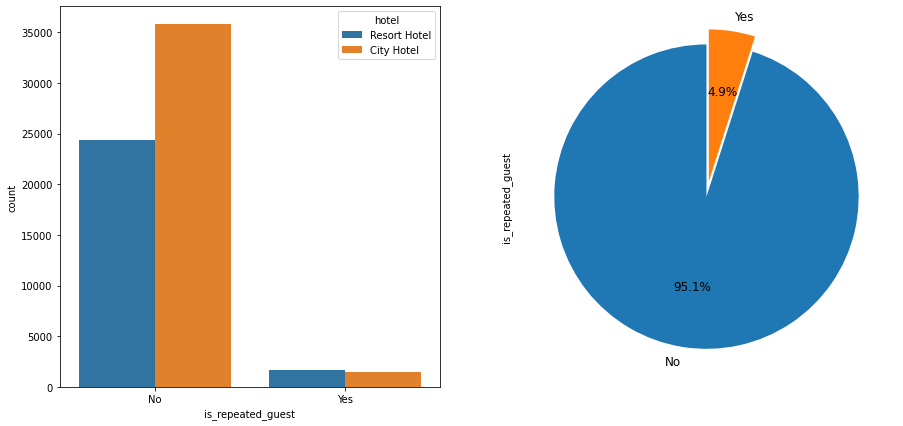

In [330]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
sns.countplot(data = repeated_customer, x = 'is_repeated_guest', hue = 'hotel')
plt.subplot(1,2,2)
repeated_customer['is_repeated_guest'].value_counts().plot(kind = 'pie', explode = [0,0.1], autopct='%1.1f%%',startangle=90, textprops={'fontsize': 12})

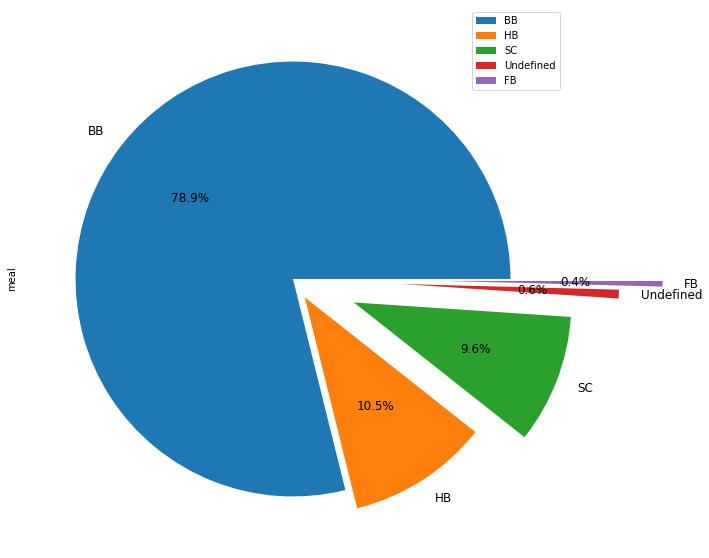

In [331]:
# Plot for Meal types for both the hotels combined
plt.figure(figsize=(10,10))
df['meal'].value_counts().plot(kind = 'pie', explode = [0,0.1,0.3,0.5,0.7], autopct='%1.1f%%', textprops={'fontsize': 12})
plt.legend(loc='upper right')

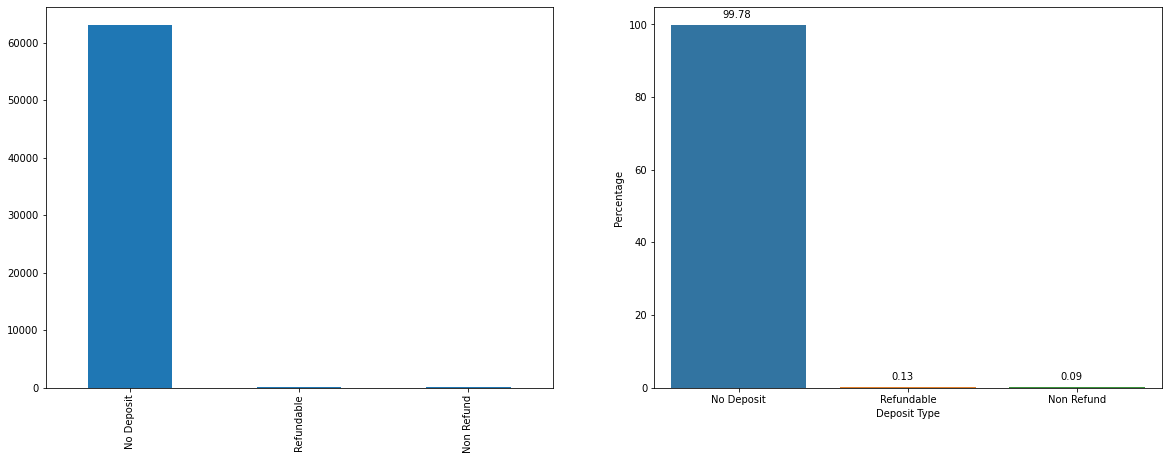

In [332]:
# # Plot for deposit types for both the hotels combined
plt.figure(figsize=(20,7))

plt.subplot(1,2,1)
df['deposit_type'].value_counts().plot(kind = 'bar')

plt.subplot(1,2,2)
x,y = convert_to_percentage(df['deposit_type'])
deposit_plot = sns.barplot(x = x, y =y)
deposit_plot.set(xlabel = 'Deposit Type', ylabel = 'Percentage')

# To mention the column values for each column
for i, v in enumerate(y):
    deposit_plot.text(i-0.1, v+2, round(float(v), 2),color = 'black')
plt.show()

In [333]:
df['required_car_parking_spaces'].describe()

count    63221.000000
mean         0.116164
std          0.322540
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          3.000000
Name: required_car_parking_spaces, dtype: float64

In [334]:
a = df['required_car_parking_spaces'].value_counts()

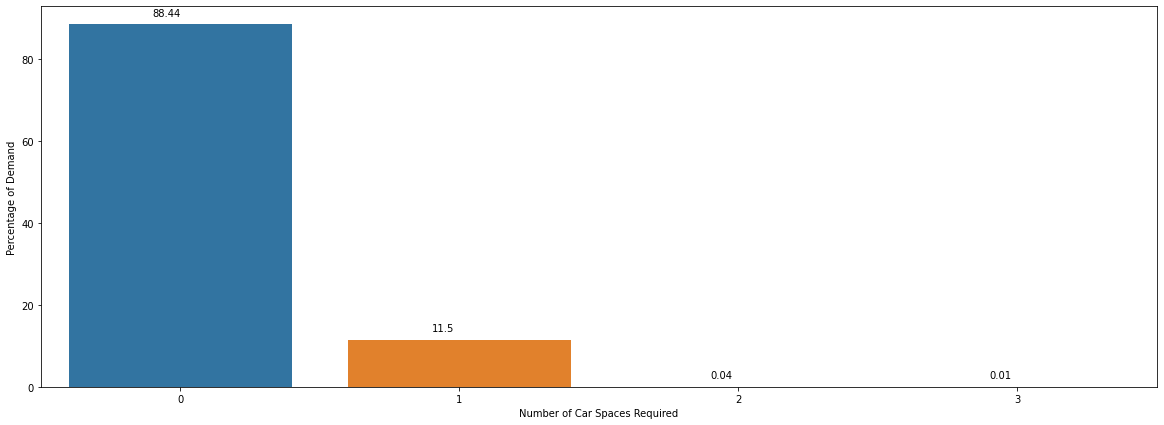

In [335]:
# Car Parking Space
plt.figure(figsize=(20,7))
x,y = convert_to_percentage(pdseries = df['required_car_parking_spaces'])
car_plot = sns.barplot(x = x, y = y)
car_plot.set(xlabel = 'Number of Car Spaces Required', ylabel = 'Percentage of Demand')
# To mention the column values for each column
for i, v in enumerate(y):
    car_plot.text(i-0.1, v+2, round(float(v), 2), color = 'black')
plt.show()

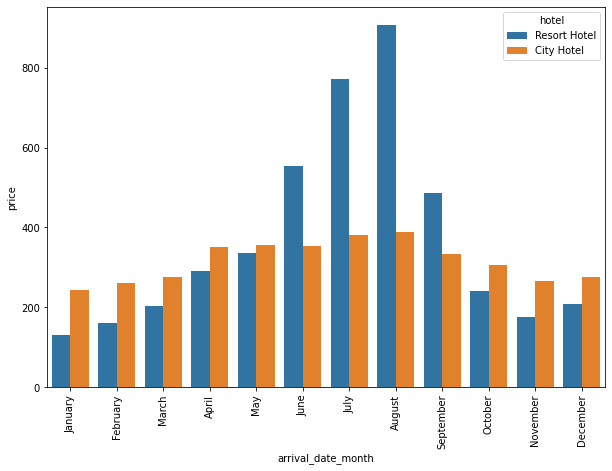

In [336]:
# Calculating average daily rate per person
plt.figure(figsize=(10,7))
order_months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df['adr_per_person'] = df['adr'] / df['total_visitors']
df['price'] = df['adr'] * (df['stays_in_weekend_nights'] + df['stays_in_week_nights'])
sns.barplot(data = df, x = 'arrival_date_month', y = 'price', hue = 'hotel',
             order = order_months, ci= None)
plt.xticks(rotation = 90)
plt.show()

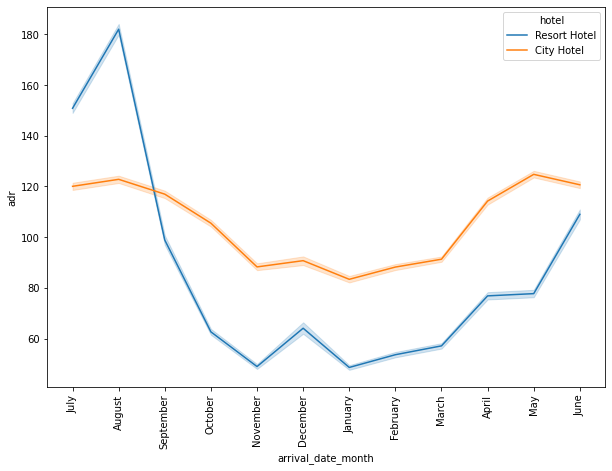

In [337]:
# ADR plot
plt.figure(figsize=(10,7))
sns.lineplot(data= df, x='arrival_date_month', y='adr', hue='hotel')
plt.xticks(rotation = 90)
plt.show()

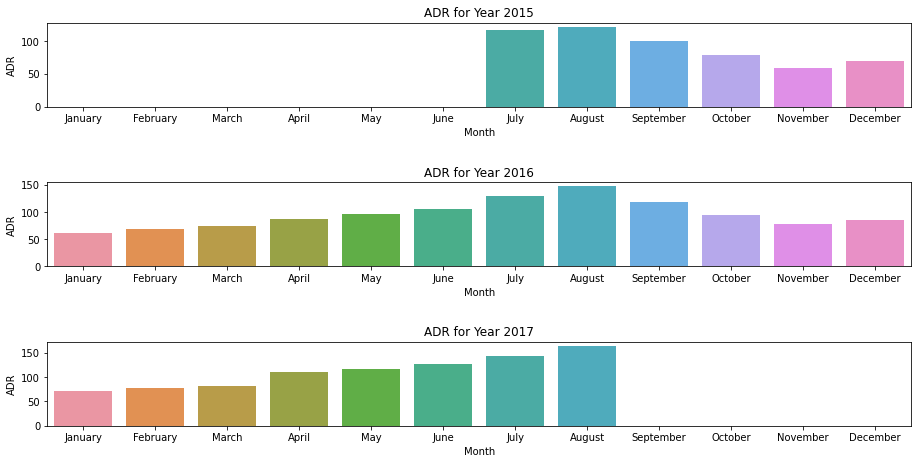

In [338]:
plt.figure(figsize=(15,7))

plt.subplot(3,1,1)
data_2015 = df[df['arrival_date_year'] == 2015]
data_2015[['arrival_date_year','arrival_date_month', 'adr']]
adr_2015 = sns.barplot(data = data_2015[['arrival_date_year','arrival_date_month', 'adr']],
                       x = data_2015['arrival_date_month'], y = data_2015['adr'],order = order_months, 
                       ci = None).set(title = 'ADR for Year 2015', xlabel ='Month', ylabel ='ADR')

plt.subplot(3,1,2)
data_2016 = df[df['arrival_date_year'] == 2016]
data_2016[['arrival_date_year','arrival_date_month', 'adr']]
adr_2016 = sns.barplot(data = data_2016[['arrival_date_year','arrival_date_month', 'adr']],
                       x = data_2016['arrival_date_month'], y = data_2016['adr'], order = order_months,
                       ci = None).set(title = 'ADR for Year 2016', xlabel ='Month', ylabel ='ADR')

plt.subplot(3,1,3)
data_2017 = df[df['arrival_date_year'] == 2017]
data_2017[['arrival_date_year','arrival_date_month', 'adr']]
adr_2017 = sns.barplot(data = data_2017[['arrival_date_year','arrival_date_month', 'adr']],
                       x = data_2017['arrival_date_month'], y = data_2017['adr'], order = order_months,
                       ci = None).set(title = 'ADR for Year 2017', xlabel ='Month', ylabel ='ADR')

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.9)
plt.show()

Room Type in high demand:

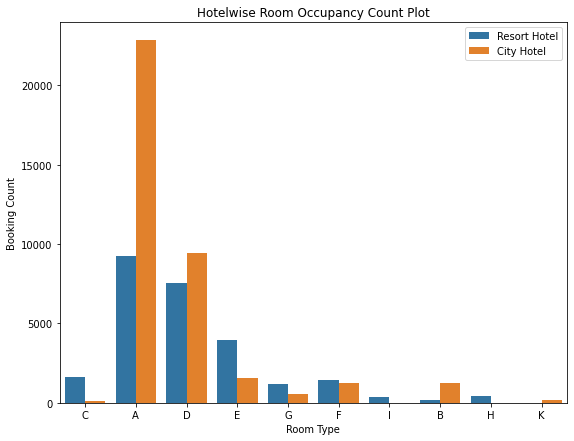

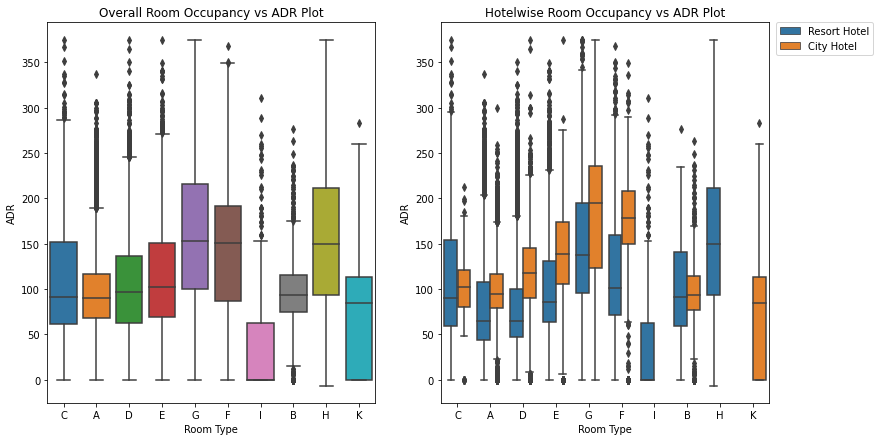

In [339]:
# Room Type
plt.rcParams['figure.figsize'] = 20,7
plt.subplot(1,2,1)
countplot(data = df, x='assigned_room_type', hue='hotel', title = 'Hotelwise Room Occupancy Count Plot', x_label = 'Room Type', y_label = 'Booking Count', rotate = 0)

plt.subplot(1,3,2)
room_vs_adr_plot = sns.boxplot(data = df, x='assigned_room_type', y = 'adr').set(title = 'Overall Room Occupancy vs ADR Plot', xlabel ='Room Type', ylabel ='ADR')

plt.subplot(1,3,3)
room_vs_adr_plot = sns.boxplot(data = df, x='assigned_room_type', y = 'adr', hue='hotel').set(title = 'Hotelwise Room Occupancy vs ADR Plot', xlabel ='Room Type', ylabel ='ADR')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

From this we can that the Room Type A is high in demand.
The room types with highest adr range are C, G, F, H & K, however effective for profit are G, H, F and E.

Looking at individual hotel types, the beneficial Room Types for hotel profit are:
City Hotel   - G, F and E
Resort Hotel - H, G, F and C